<a href="https://colab.research.google.com/github/razim-manzoor/Employee_Retention/blob/main/CNNPlantDiseaseClassificationV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pwd

/content


In [4]:
!cp /content/drive/MyDrive/LTAiDs/Datas/Plant_leaf_diseases_dataset.zip ./

In [5]:
!unzip /content/Plant_leaf_diseases_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/i

In [40]:
# importing some necessary packages
import os
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import clone_model

from tensorflow.keras.preprocessing import image

In [11]:
dataset_path = '/content/Plant_leave_diseases_dataset_without_augmentation'

In [14]:
# Checking the classes and the count
classes = os.listdir(dataset_path)
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

In [13]:
# Printing it as a table
print(f"{'Class':<30} {'Count':<10}")
print("-" * 40)
for cls, count in class_counts.items():
  print(f"{cls:<30} {count:<10}")

Class                          Count     
----------------------------------------
Apple___healthy                1645      
Corn___Common_rust             1192      
Corn___Northern_Leaf_Blight    985       
Strawberry___Leaf_scorch       1109      
Tomato___Early_blight          1000      
Tomato___Tomato_mosaic_virus   373       
Raspberry___healthy            371       
Tomato___Bacterial_spot        2127      
Soybean___healthy              5090      
Tomato___Leaf_Mold             952       
Potato___Late_blight           1000      
Apple___Cedar_apple_rust       275       
Potato___healthy               152       
Background_without_leaves      1143      
Apple___Black_rot              621       
Orange___Haunglongbing_(Citrus_greening) 5507      
Grape___healthy                423       
Grape___Black_rot              1180      
Cherry___Powdery_mildew        1052      
Tomato___healthy               1591      
Corn___Cercospora_leaf_spot Gray_leaf_spot 513       
Apple___Apple

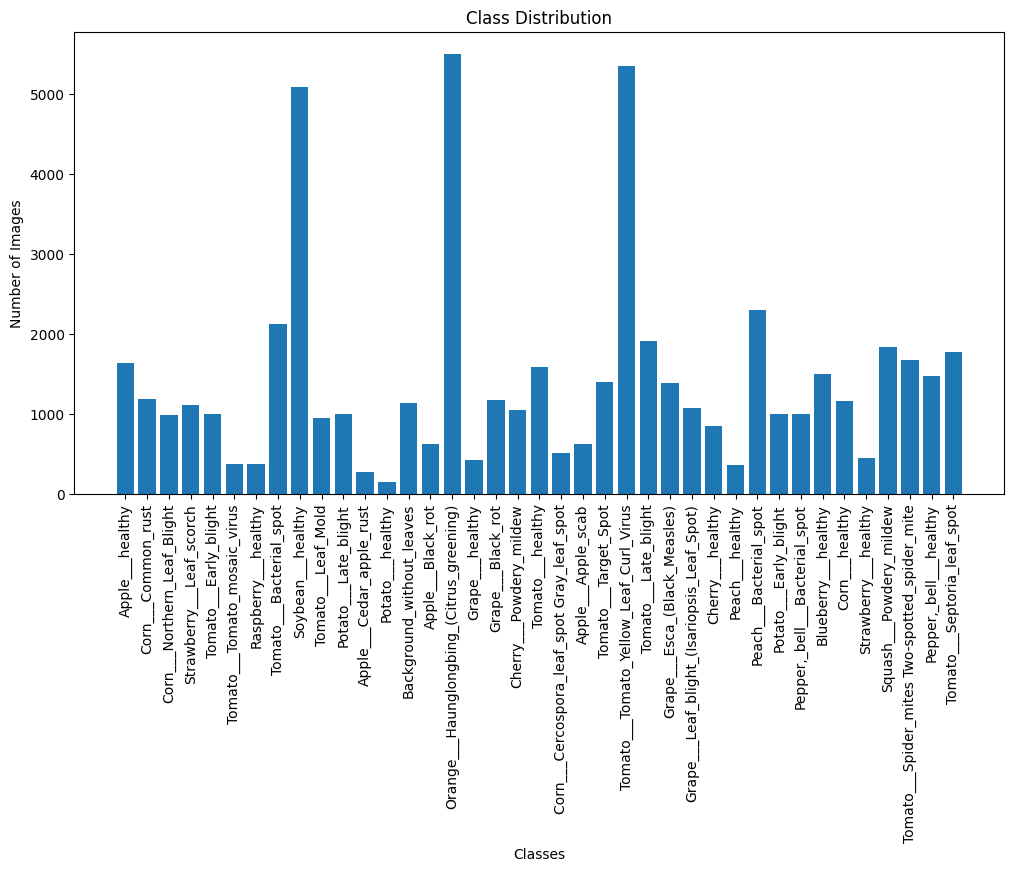

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

In [16]:
epochs=10
image_size=(150,150)
batch_size=32

In [19]:
# Data generators with augementation
train_gen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [20]:
# Training Data
train_data = train_gen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 44371 images belonging to 39 classes.


In [22]:
# Validation Data
val_data = train_gen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation set
)

Found 11077 images belonging to 39 classes.


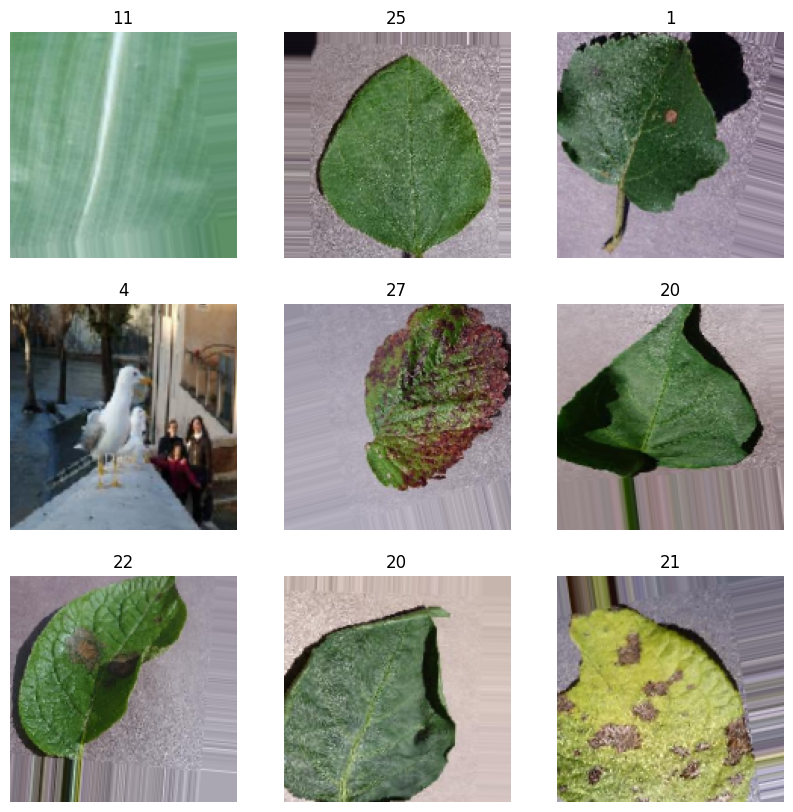

In [23]:
# Visualize Sample Images
def plot_sample_images(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

plot_sample_images(train_data)

In [27]:
# CNN Model Architecture
model = Sequential()

# Adding the layers
# Layer 1 - convolution
model.add(
    Conv2D(filters=32,
           kernel_size=(3, 3),
           activation='relu',
           input_shape=(150, 150, 3))
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2 - Convolution
model.add(
    Conv2D(filters=64,
           kernel_size=(3, 3),
           activation='relu')
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3 - Convolution
model.add(
    Conv2D(filters=128,
           kernel_size=(3, 3),
           activation='relu')
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4 - Flattening the feature maps
model.add(Flatten())

# Layer 5 - Fully Connected Layer
model.add(Dense(512, activation='relu'))

# Layer 6 - Dropout for regularization
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(39, activation='softmax'))

# Model Compilation
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# Training the CNN Model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1
)

Epoch 1/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 355s 255ms/step - accuracy: 0.4440 - loss: 2.0158 - val_accuracy: 0.6567 - val_loss: 1.2457
Epoch 2/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 340s 244ms/step - accuracy: 0.6106 - loss: 1.3497 - val_accuracy: 0.7399 - val_loss: 0.9160
Epoch 3/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 403s 260ms/step - accuracy: 0.6744 - loss: 1.0984 - val_accuracy: 0.7767 - val_loss: 0.7579
Epoch 4/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 367s 248ms/step - accuracy: 0.7134 - loss: 0.9523 - val_accuracy: 0.8138 - val_loss: 0.6547
Epoch 5/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 362s 260ms/step - accuracy: 0.7482 - loss: 0.8366 - val_accuracy: 0.8335 - val_loss: 0.5700
Epoch 6/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 344s 247ms/step - accuracy: 0.7657 - loss: 0.7651 - val_accuracy: 0.8434 - val_loss: 0.5141
Epoch 7/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 376s 243ms/step - accuracy: 0.7845 - loss: 0.6973 - val_accuracy: 0.8467 - val_loss: 0.5002
Epoch 8/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 341s 244ms/step - ac

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 39)                  │          20,007 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,161,015 (218.05 MB)

 Trainable params: 19,053,671 (72.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,107,344 (145.37 MB)

In [33]:
model.save("plant_disease_classification_v1.h5")

In [38]:
# Retraining the model with more epochs - V2 with callbacks + epochs
# Total 20 epochs 10 earlier with 10 now
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 346s 249ms/step - accuracy: 0.8626 - loss: 0.4339 - val_accuracy: 0.9183 - val_loss: 0.2835 - learning_rate: 1.0000e-04
Epoch 2/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 375s 244ms/step - accuracy: 0.8723 - loss: 0.4019 - val_accuracy: 0.9264 - val_loss: 0.2406 - learning_rate: 1.0000e-04
Epoch 3/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 379s 242ms/step - accuracy: 0.8759 - loss: 0.3893 - val_accuracy: 0.9195 - val_loss: 0.2678 - learning_rate: 1.0000e-04
Epoch 4/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 341s 245ms/step - accuracy: 0.8820 - loss: 0.3759 - val_accuracy: 0.9280 - val_loss: 0.2404 - learning_rate: 1.0000e-04
Epoch 5/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 379s 243ms/step - accuracy: 0.8837 - loss: 0.3617 - val_accuracy: 0.9252 - val_loss: 0.2479 - learning_rate: 1.0000e-04
Epoch 6/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 380s 242ms/step - accuracy: 0.8914 - loss: 0.3455 - val_accuracy: 0.9304 - val_loss: 0.2289 - learning_rate: 1.0000e-04
Epoch 7/10
1387/1387 ━━━━━━━

In [39]:
model.save("plant_disease_classification_v2.h5")

In [48]:
def predict_plant_disease(img_path, target_size=(150, 150)):
    """
    Function to predict the disease of a plant leaf given an image.

    Parameters:
    - img_path: Path to the image for prediction.
    - target_size: The size to which the image will be resized (default is (150, 150)).

    Returns:
    - predicted_label: The predicted class label.
    - prediction_probability: The probability of the predicted class.
    """
    # Get the class names in order
    class_indices = train_data.class_indices
    classes = {v: k for k, v in class_indices.items()}

    # Load
    img = image.load_img(img_path, target_size=target_size)

    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class probabilities
    predictions = model.predict(img_array)

    # predicted class
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = classes[predicted_class[0]]

    # probability of the predicted class
    prediction_probability = predictions[0][predicted_class[0]]

    # Plot the image and show the prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label} (Confidence: {prediction_probability:.2f})')
    plt.axis('off')
    plt.show()

    return (f'The predicted label is: {predicted_label}'), (f'Prediction Probability: {prediction_probability:.2f}')

## Predicting on unseen data


> picture fetched from google



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


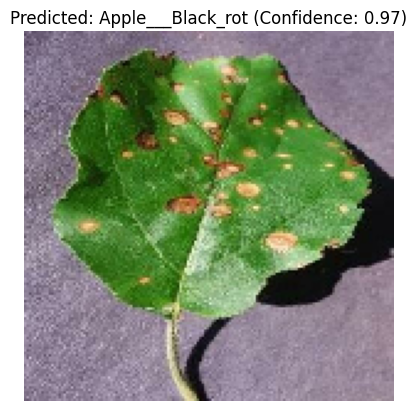

('The predicted label is: Apple___Black_rot', 'Prediction Probability: 0.97')

In [49]:
img = '/content/Apple-black-rot-figure-1-shows-apple-black-rot-while-preprocessing-an-infected-leaf.png'

predict_plant_disease(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


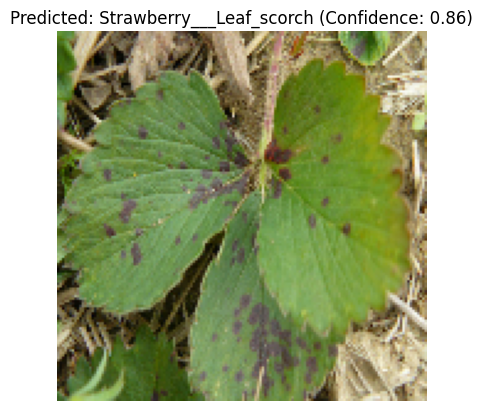

('The predicted label is: Strawberry___Leaf_scorch',
 'Prediction Probability: 0.86')

In [50]:
img2 = '/content/strawberryleaf.jpeg'

predict_plant_disease(img2)